In [394]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
import xgboost as xgb

In [395]:
stress_clinical=pd.read_csv("combined_lagEDA.csv")

In [396]:
stress_clinical.head(20)       #already has stress label

,30,29,28,27,26,25,24,23,22,21,...,HRR_Mean,HRR_Min,HRR_Max,HRR_Std,HRR_RMS,TEMPR_Mean,TEMPR_Min,TEMPR_Max,TEMPR_Std,Stress
0,0.132578,0.123534,0.115152,0.110787,0.109565,0.106694,0.100631,0.093710,0.088657,0.084547,...,0.641552,0.639566,0.643243,0.100525,0.235069,0.821491,0.821239,0.823944,0.120422,0.0
1,0.123534,0.115152,0.110787,0.109565,0.106694,0.100631,0.093710,0.088657,0.084547,0.084598,...,0.642973,0.639566,0.643243,0.089270,0.229293,0.827471,0.828319,0.830986,0.105027,0.0
2,0.115152,0.110787,0.109565,0.106694,0.100631,0.093710,0.088657,0.084547,0.084598,0.089846,...,0.643921,0.640921,0.645946,0.083372,0.157093,0.832395,0.831858,0.834507,0.099446,0.0
3,0.110787,0.109565,0.106694,0.100631,0.093710,0.088657,0.084547,0.084598,0.089846,0.094890,...,0.645952,0.644986,0.645946,0.041375,0.131024,0.837759,0.842478,0.839789,0.089739,0.0
4,0.109565,0.106694,0.100631,0.093710,0.088657,0.084547,0.084598,0.089846,0.094890,0.098347,...,0.646764,0.644986,0.648649,0.066093,0.113470,0.843123,0.846018,0.848592,0.095171,0.0
5,0.106694,0.100631,0.093710,0.088657,0.084547,0.084598,0.089846,0.094890,0.098347,0.101107,...,0.649743,0.644986,0.651351,0.095655,0.131024,0.848663,0.851327,0.852113,0.115869,0.0
6,0.100631,0.093710,0.088657,0.084547,0.084598,0.089846,0.094890,0.098347,0.101107,0.104240,...,0.653128,0.653117,0.654054,0.047827,0.122562,0.855259,0.856637,0.859155,0.114968,0.0
7,0.093710,0.088657,0.084547,0.084598,0.089846,0.094890,0.098347,0.101107,0.104240,0.108121,...,0.654211,0.653117,0.654054,0.036646,0.103584,0.860359,0.863717,0.862676,0.078468,0.0
8,0.088657,0.084547,0.084598,0.089846,0.094890,0.098347,0.101107,0.104240,0.108121,0.112588,...,0.655294,0.655827,0.654054,0.038223,0.080236,0.863876,0.867257,0.866197,0.089772,0.0
9,0.084547,0.084598,0.089846,0.094890,0.098347,0.101107,0.104240,0.108121,0.112588,0.117063,...,0.657799,0.655827,0.658108,0.052216,0.076820,0.867130,0.870796,0.867958,0.068042,0.0


In [397]:
print(stress_clinical.columns)

Index(['30', '29', '28', '27', '26', '25', '24', '23', '22', '21', '20', '19',
       '18', '17', '16', '15', '14', '13', '12', '11', '10', '9', '8', '7',
       '6', '5', '4', '3', '2', '1', 'EDAR_Mean', 'EDAR_Min', 'EDAR_Max',
       'EDAR_Std', 'EDAR_Kurtosis', 'EDAR_Skew', 'Num_PeaksR',
       'EDAR_Amphitude', 'EDAR_Duration', 'HRR_Mean', 'HRR_Min', 'HRR_Max',
       'HRR_Std', 'HRR_RMS', 'TEMPR_Mean', 'TEMPR_Min', 'TEMPR_Max',
       'TEMPR_Std', 'Stress'],
      dtype='object')


In [398]:
stress_clinical["Stress"].value_counts() 
# 0.0 - No stress  1.0 - Medium stress  2.0 - High stress

0.0    5410
2.0    4785
1.0    2250
Name: Stress, dtype: int64

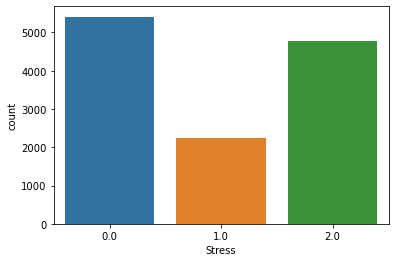

In [399]:
sns.countplot(x="Stress", data =stress_clinical)
plt.show()

In [400]:
EDA_file=pd.read_csv("EDA.csv")

In [401]:
EDA_file.head()

,1636752663.000000
0,4.000000
1,0.000000
2,0.683901
3,0.672642
4,0.606045


In [402]:
EDA_file.describe()

,1636752663.000000
count,22981.000000
mean,1.447492
std,1.394011
min,0.000000
25%,0.595799
50%,0.732835
75%,1.905056
max,6.822323


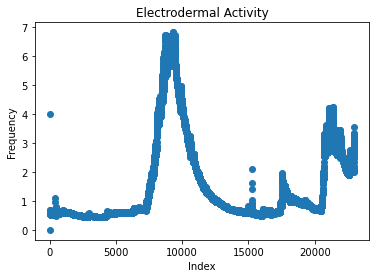

In [403]:
plt.scatter(EDA_file.index,EDA_file['1636752663.000000'])
plt.xlabel('Index') 
plt.ylabel('Frequency') 
plt.title("Electrodermal Activity")
plt.show()

In [404]:
HR_file=pd.read_csv("HR.csv")

In [405]:
HR_file.head()

,1636752673.000000
0,1.00
1,70.00
2,76.50
3,79.33
4,74.00


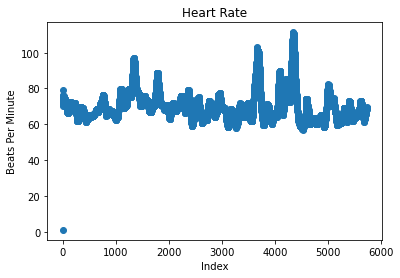

In [406]:
plt.scatter(HR_file.index,HR_file['1636752673.000000'])
plt.xlabel('Index') 
plt.ylabel('Beats Per Minute') 
plt.title("Heart Rate")
plt.show()

<AxesSubplot:xlabel='Stress', ylabel='EDAR_Mean'>

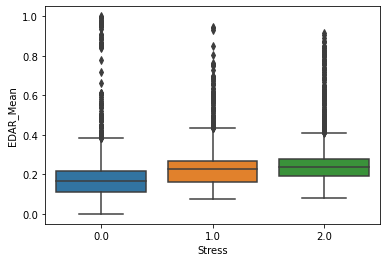

In [407]:
sns.boxplot(y='EDAR_Mean', x='Stress', data=stress_clinical)

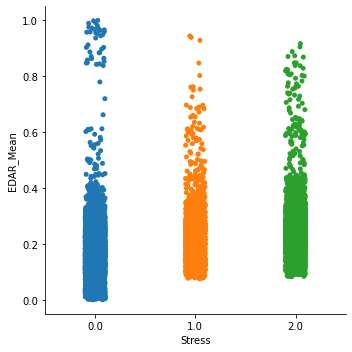

In [408]:
sns.catplot(data=stress_clinical, x="Stress", y="EDAR_Mean")

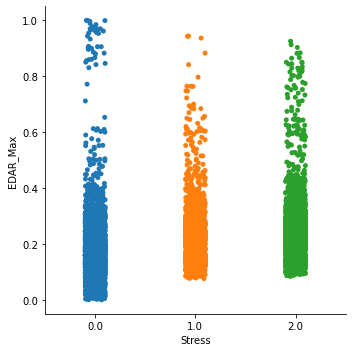

In [409]:
sns.catplot(data=stress_clinical, x="Stress", y="EDAR_Max")

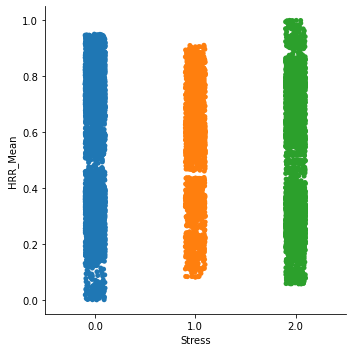

In [410]:
sns.catplot(data=stress_clinical, x="Stress", y="HRR_Mean")

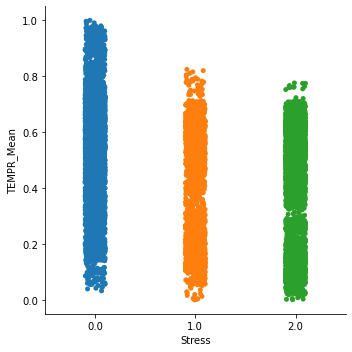

In [411]:
sns.catplot(data=stress_clinical, x="Stress", y="TEMPR_Mean")

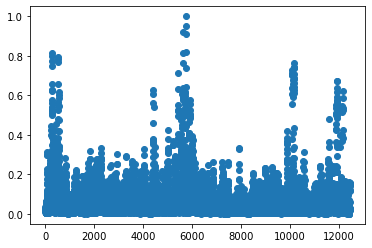

In [412]:
plt.scatter(stress_clinical.index,stress_clinical['EDAR_Std'])
plt.show()

In [413]:
#final dataframe with the selected features for skin activity,temperature and Heart Rate

In [414]:
df2=stress_clinical.drop(stress_clinical.iloc[:, 0:30],axis = 1)

In [415]:
df2

,EDAR_Mean,EDAR_Min,EDAR_Max,EDAR_Std,EDAR_Kurtosis,EDAR_Skew,Num_PeaksR,EDAR_Amphitude,EDAR_Duration,HRR_Mean,HRR_Min,HRR_Max,HRR_Std,HRR_RMS,TEMPR_Mean,TEMPR_Min,TEMPR_Max,TEMPR_Std,Stress
0,0.105191,0.104202,0.107022,0.035656,0.224016,0.556235,0.0,0.000000,0.000000,0.641552,0.639566,0.643243,0.100525,0.235069,0.821491,0.821239,0.823944,0.120422,0.0
1,0.102822,0.102238,0.103630,0.023788,0.245929,0.506460,0.0,0.000000,0.000000,0.642973,0.639566,0.643243,0.089270,0.229293,0.827471,0.828319,0.830986,0.105027,0.0
2,0.101157,0.101213,0.101679,0.018717,0.239148,0.594386,0.0,0.033423,0.000000,0.643921,0.640921,0.645946,0.083372,0.157093,0.832395,0.831858,0.834507,0.099446,0.0
3,0.099952,0.100359,0.099644,0.011283,0.192728,0.504364,0.0,0.000000,0.000000,0.645952,0.644986,0.645946,0.041375,0.131024,0.837759,0.842478,0.839789,0.089739,0.0
4,0.099298,0.100188,0.098796,0.005735,0.315883,0.630771,0.0,0.000000,0.000000,0.646764,0.644986,0.648649,0.066093,0.113470,0.843123,0.846018,0.848592,0.095171,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12440,0.067427,0.057824,0.077510,0.156687,0.199887,0.512518,0.0,0.000000,0.000000,0.696047,0.696477,0.694595,0.037640,0.113470,0.504045,0.506195,0.503521,0.074744,0.0
12441,0.078543,0.069611,0.084718,0.116968,0.242380,0.423325,0.0,0.000000,0.000000,0.697062,0.696477,0.697297,0.032084,0.080236,0.501935,0.502655,0.503521,0.088706,0.0
12442,0.085600,0.081397,0.088111,0.061269,0.243079,0.411081,0.0,0.000000,0.000000,0.696927,0.696477,0.697297,0.052638,0.153640,0.498065,0.497345,0.500000,0.093660,0.0
12443,0.088589,0.087718,0.088365,0.018788,0.383277,0.280357,0.5,0.000000,0.403326,0.696182,0.696477,0.697297,0.053092,0.160471,0.497186,0.497345,0.496479,0.074585,0.0


In [416]:
features = df2.drop(['Stress'], axis=1) 
target = stress_clinical['Stress']

In [417]:


#Training and testing data

X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)

Shape of training feature: (9956, 18)
Shape of testing feature: (2489, 18)
Shape of training label: (9956,)
Shape of testing label: (2489,)


Decision Tree Classifier 

In [418]:
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [419]:
y_pred= dt.predict(X_test)

In [420]:

print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Rsquared score:',r2_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred,average='macro'))
print('Recall:', recall_score(y_test, y_pred,average='macro'))
print('Precision:', precision_score(y_test, y_pred,average='macro'))




Mean squared error: 0.3282442748091603
Rsquared score: 0.6006762637283225
Accuracy: 0.8368822820409804
F1 score: 0.8070838064084604
Recall: 0.805014660573366
Precision: 0.8094294371300693


Random Forest

In [421]:
#Hyperparameter tuning using GridSearchCV

In [422]:
n_estimators = [5,20,30,50,100] 
min_samples_split = [2, 6,8,10] 
bootstrap = [True, False] 
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)] 
min_samples_leaf = [1,2, 3, 4] 
max_features = ['auto', 'sqrt'] 

random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}

In [423]:
rf = RandomForestClassifier()

In [424]:

rf_search = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 50, cv = 5, verbose=2, random_state=30, n_jobs = -1)


In [425]:
rf_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 6, 8, 10],
                                        'n_estimators': [5, 20, 30, 50, 100]},
                   random_state=30, verbose=2)

In [426]:
#Best parameters
print ('Best Parameters: ', rf_search.best_params_, ' \n')


Best Parameters:  {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': False}  



In [427]:
#Using our best parameters 

In [428]:
clf = RandomForestClassifier(n_estimators = 50, min_samples_split = 2, min_samples_leaf= 2, max_features = 'auto', max_depth= 100, bootstrap=False) 

clf.fit(X_train, y_train)
 
y_pred = clf.predict(X_test)

In [429]:
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Rsquared score:',r2_score(y_test, y_pred))
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred,average='macro'))
print('Recall:', recall_score(y_test, y_pred,average='macro'))
print('Precision:', precision_score(y_test, y_pred,average='macro'))

Mean squared error: 0.14905584572117317
Rsquared score: 0.8186669447285284
Accuracy:  0.9292888710325432
F1 score: 0.9167094678313612
Recall: 0.9091900605894008
Precision: 0.9258970378672006


In [430]:
#Feature Importance

In [431]:
 
imp = clf.feature_importances_
indx = np.argsort(imp)[::-1]

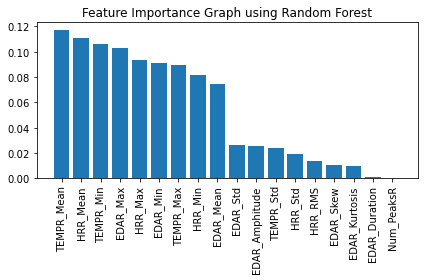

In [432]:
 
plt.title('Feature Importance Graph using Random Forest')
plt.bar(range(X_train.shape[1]), imp[indx], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indx], rotation=90)
plt.tight_layout()
plt.show()

XGBoost

In [437]:
xclf = xgb.XGBClassifier(max_depth=7, objective='multi:softprob', n_estimators=300)
xclf.fit(X_train, y_train)  
y_pred = xclf.predict(X_test)

In [438]:
 
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred,average='macro'))
print('Recall:', recall_score(y_test, y_pred,average='macro'))
print('Precision:', precision_score(y_test, y_pred,average='macro'))

Accuracy:  0.9132181599035757
F1 score: 0.8946499771601978
Recall: 0.8869633697383413
Precision: 0.9043331799921654


In [439]:
mean_squared_error(y_test,y_pred)

0.1687424668541583

In [440]:
r2_score(y_test, y_pred)

0.7947172959190887